In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('../content/diamonds.csv', index_col='Unnamed: 0')
df.head()

,carat,cut,tdp,table,price,x,y,z
1,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,63.3,58.0,335,4.34,4.35,2.75


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 8 columns):
carat    53940 non-null float64
cut      53940 non-null object
tdp      53940 non-null float64
table    53940 non-null float64
price    53940 non-null int64
x        53940 non-null float64
y        53940 non-null float64
z        53940 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.7+ MB


cut 컬럼은 범주형 데이터

In [0]:
df.isnull().sum()

carat    0
cut      0
tdp      0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [0]:
df.shape

(53940, 8)

## diamonds 데이터 셋 변수 설명

- carat: diamond의 무게
- cut: diamond의 절단 상태 (Fair, Good, Very Good, Premium, Ideal)
- tdp: total depth percentage = 2*z / (x+y)
- table: diamond 최대 너비 대비 최상단 너비의 비율 (width of top of diamond relative to widest point)
- price: diamond의 가격($)
- x: 길이(mm) 
- y: 폭(mm) 
- z: 깊이(mm)

## 1, 2번

In [0]:
dataset = df.loc[:, ['carat', 'price']]
dataset.head()

,carat,price
1,0.23,326
2,0.21,326
3,0.23,327
4,0.29,334
5,0.31,335


In [0]:
data = dataset.values
X = data[:, 0]
Y = data[:, 1]

In [0]:
print(X.shape)
print(Y.shape)

(53940,)
(53940,)


### 최소제곱법으로 기울기와 절편을 구한다

In [0]:
# X와 Y의 평균
meanx = np.mean(X)
meany = np.mean(Y)

In [0]:
# 분자(dividend), 분모(divisor)

divisor = np.sum([(i - meanx)**2 for i in X])
def a(X, meanx, Y, meany):
    sum = 0
    for i in range(len(X)):
        sum += (X[i] - meanx)*(Y[i] - meany)
    return sum

dividend = a(X, meanx, Y, meany)

In [0]:
# 분자, 분모, 기울기와 y절편
print('분자 : ', dividend)
print('분모 : ', divisor)
print('기울기 : %.3f' % (dividend/divisor))
print('y절편 : %.3f' % (meany-(meanx*(dividend/divisor))))

분자 :  94003020.98309612
분모 :  12119.373744180572
기울기 : 7756.426
y절편 : -2256.361


## 선형회귀 함수 : y = 7756.426x - 2256.361

X값을 회귀식에 넣어서 Y의 예측값을 구한다

In [0]:
Y_prediction = 7756.426 * X - 2256.361
Y_prediction

array([-472.38302, -627.51154, -472.38302, ..., 3173.1372 , 4414.16536,
       3560.9585 ])

## visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

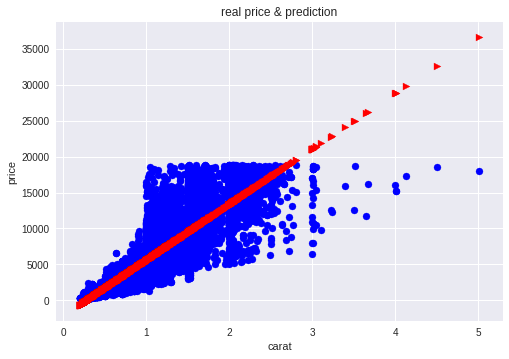

In [0]:
plt.scatter(data=dataset, x=X, y=Y, marker='o', color='blue')  # 실제 가격
plt.scatter(data=dataset, x=X, y=Y_prediction, marker='>', color='red')  # 예측 가격
plt.xlabel('carat')
plt.ylabel('price')
plt.title('real price & prediction')
plt.show()

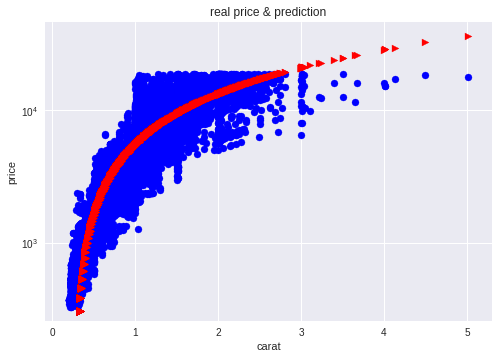

In [0]:
plt.scatter(data=dataset, x=X, y=Y, marker='o', color='blue')  # 실제 가격
plt.scatter(data=dataset, x=X, y=Y_prediction, marker='>', color='red')  # 예측 가격
plt.xlabel('carat')
plt.ylabel('price')
plt.title('real price & prediction')
plt.yscale('log')
plt.show()

In [0]:
dataset.corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


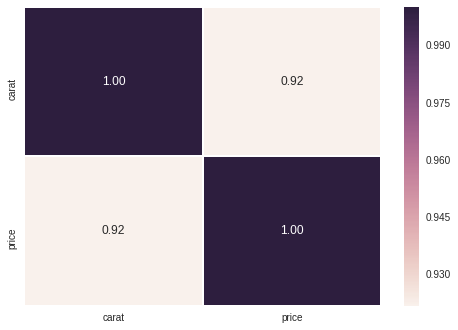

In [0]:
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', linewidths=1, cbar=True)

## r2 확인

In [0]:
from sklearn.metrics import r2_score

In [0]:
X

array([0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75])

In [0]:
Y

array([ 326.,  326.,  327., ..., 2757., 2757., 2757.])

In [0]:
print('결졍계수 r2 : {:.3f}'.format(r2_score(y_true=Y, y_pred=Y_prediction)))

결졍계수 r2 : 0.849


# sklearn LinearRegression

## 1) 교차검증

In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [0]:
lr = LinearRegression()
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)

In [0]:
# X는 1차원 array이므로 2차원 array로 변환한다.
X_2array = X.reshape(-1,1)

In [0]:
lr.fit(X_2array, Y)
ridge.fit(X_2array, Y)
lasso.fit(X_2array, Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [0]:
kfold = KFold(n_splits=6, shuffle=True, random_state=0)
lr_score = cross_val_score(estimator=lr, X=X_2array, y=Y, cv=kfold)
ridge_score = cross_val_score(estimator=ridge, X=X_2array, y=Y, cv=kfold)
lasso_score = cross_val_score(estimator=lasso, X=X_2array, y=Y, cv=kfold)
print('LinearRegression 교차검증점수 : {}, {:.3f}'.format(lr_score, lr_score.mean()))
print('Ridge 교차검증점수 : {}, {:.3f}'.format(ridge_score, ridge_score.mean()))
print('Lasso 교차검증점수 : {}, {:.3f}'.format(lasso_score, lasso_score.mean()))

LinearRegression 교차검증점수 : [0.85191387 0.84846434 0.84480714 0.8472157  0.85369276 0.84983754], 0.849
Ridge 교차검증점수 : [0.85191209 0.84846519 0.84480786 0.8472166  0.85369124 0.84983835], 0.849
Lasso 교차검증점수 : [0.85190333 0.84846901 0.84481111 0.8472207  0.85368373 0.84984199], 0.849


## 2) train_test_split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_2array, Y, test_size=0.3, random_state=0)

In [0]:
lr = LinearRegression()
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)

lr.fit(X_2array, Y)
ridge.fit(X_2array, Y)
lasso.fit(X_2array, Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print('LinearRegression training set accuracy : {:.3f}'.format(lr.score(X_train, y_train)))
print('LinearRegression test set accuracy : {:.3f}'.format(lr.score(X_test, y_test)))
print('---------------------------')
print('Ridge training set accuracy : {:.3f}'.format(ridge.score(X_train, y_train)))
print('Riege test set accuracy : {:.3f}'.format(ridge.score(X_test, y_test)))
print('---------------------------')
print('Lasso training set accuracy : {:.3f}'.format(lasso.score(X_train, y_train)))
print('Lasso test set accuracy : {:.3f}'.format(lasso.score(X_test, y_test)))

LinearRegression training set accuracy : 0.849
LinearRegression test set accuracy : 0.851
---------------------------
Ridge training set accuracy : 0.849
Riege test set accuracy : 0.851
---------------------------
Lasso training set accuracy : 0.849
Lasso test set accuracy : 0.851
